The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


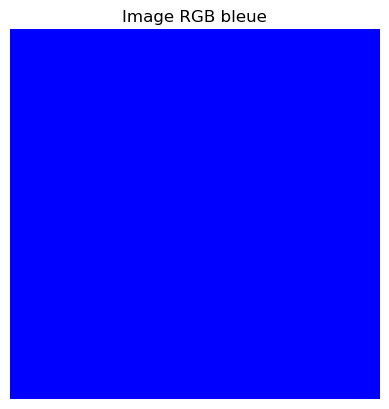

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Image RGB bleue
img_rgb = np.zeros((256, 256, 3), dtype=np.uint8)
img_rgb[:] = (255, 0, 0)  # Bleu en BGR (OpenCV)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title("Image RGB bleue")
plt.axis('off')
plt.show()

In [2]:
#### b) Image en niveaux de gris

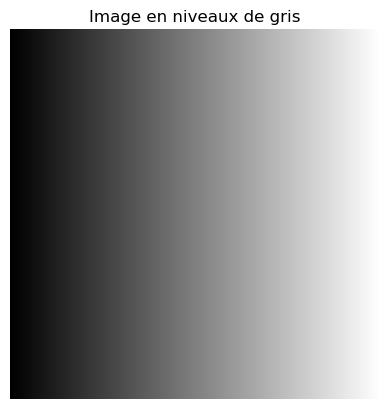

In [3]:
# Dégradé horizontal
img_gray = np.tile(np.arange(256, dtype=np.uint8), (256, 1))
plt.imshow(img_gray, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis('off')
plt.show()

In [4]:
#### c) Image binaire

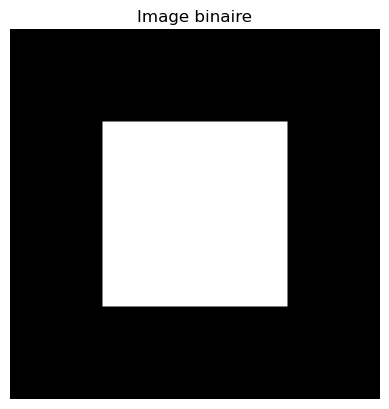

In [5]:
# Carré blanc sur fond noir
img_bin = np.zeros((256, 256), dtype=np.uint8)
img_bin[64:192, 64:192] = 255
plt.imshow(img_bin, cmap='gray')
plt.title("Image binaire")
plt.axis('off')
plt.show()

In [6]:
## Partie 2 : Analyse d’Images Réelles

# Dans cette partie, nous allons charger une image réelle, afficher ses caractéristiques, analyser son histogramme, la normaliser, modifier certains pixels, puis appliquer différentes transformations classiques du traitement d’image.

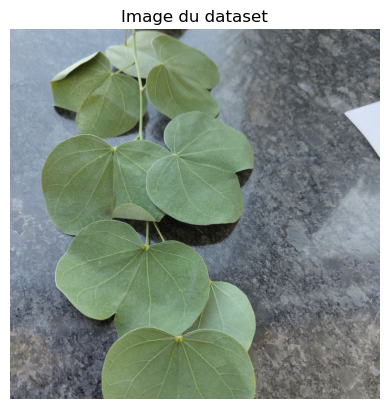

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger une image du dataset (adapter le chemin si besoin)
img = cv2.imread('../1.jpg')  # Remplace par le chemin réel de ton image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image du dataset")
plt.axis('off')
plt.show()

In [8]:
### 2.1 Caractéristiques de l’image
# Affichons les dimensions, le type et la taille de l’image.

In [9]:
print(f"Dimensions : {img.shape}")
print(f"Type : {img.dtype}")
print(f"Taille (nombre de pixels) : {img.size}")

Dimensions : (3072, 3072, 3)
Type : uint8
Taille (nombre de pixels) : 28311552


In [10]:
### 2.2 Histogramme des couleurs
# Visualisons la répartition des intensités pour chaque canal de couleur.

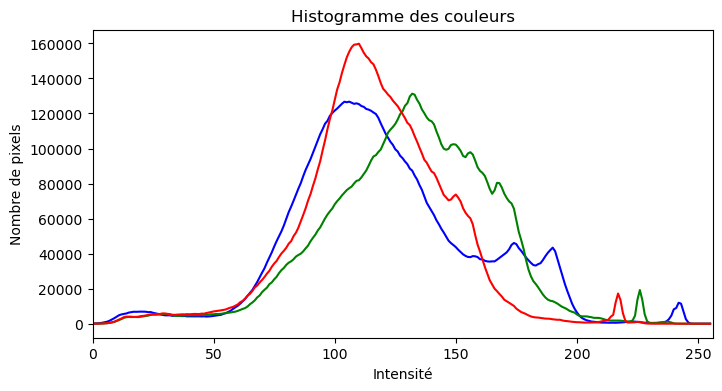

In [11]:
colors = ('b', 'g', 'r')
plt.figure(figsize=(8,4))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Histogramme des couleurs')
plt.xlabel('Intensité')
plt.ylabel('Nombre de pixels')
plt.show()

In [12]:
### 2.3 Normalisation de l’image
# On ramène les valeurs de pixels entre 0 et 1.

In [13]:
img_norm = img.astype(np.float32) / 255.0
print(f"Min: {img_norm.min()}, Max: {img_norm.max()}")

Min: 0.0, Max: 1.0


In [14]:
### 2.4 Modification d’un ensemble de pixels
# On colore un carré rouge en haut à gauche de l’image.

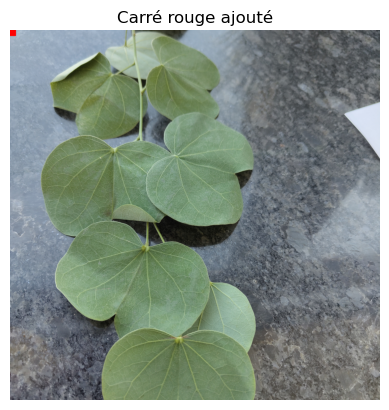

In [15]:
img_mod = img.copy()
img_mod[0:50, 0:50] = [0, 0, 255]  # Rouge en BGR
plt.imshow(cv2.cvtColor(img_mod, cv2.COLOR_BGR2RGB))
plt.title("Carré rouge ajouté")
plt.axis('off')
plt.show()

In [16]:
### 2.5 Transformations classiques

# Nous allons maintenant appliquer différentes transformations :  
# - Conversion en niveaux de gris  
# - Seuillage et détection de contours  
# - Débruitage (filtres)  
# - Opérations morphologiques  
# - Compression

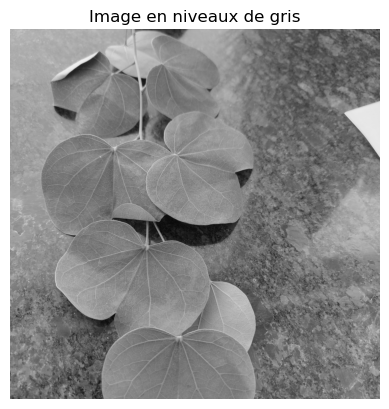

In [17]:
# Conversion en niveaux de gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis('off')
plt.show()

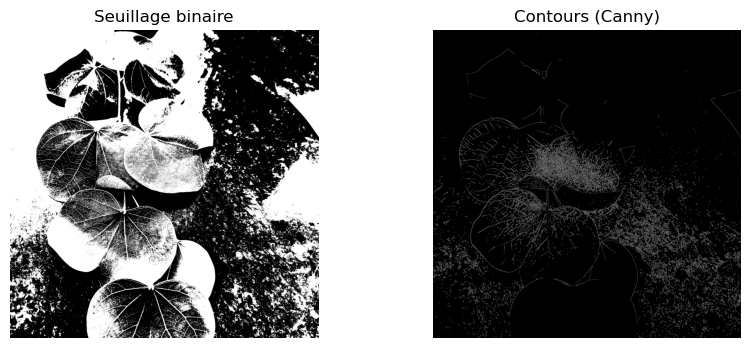

In [18]:
# Seuillage et détection de contours
_, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(img_gray, 100, 200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_thresh, cmap='gray')
plt.title("Seuillage binaire")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Contours (Canny)")
plt.axis('off')
plt.show()

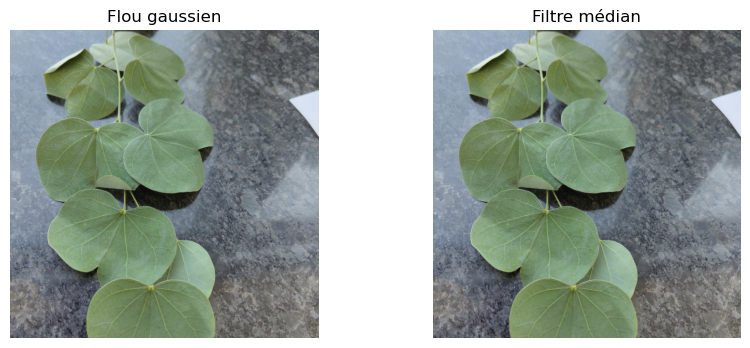

In [19]:
# Débruitage avec filtres
img_blur = cv2.GaussianBlur(img, (7, 7), 0)
img_median = cv2.medianBlur(img, 5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.title("Flou gaussien")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
plt.title("Filtre médian")
plt.axis('off')
plt.show()

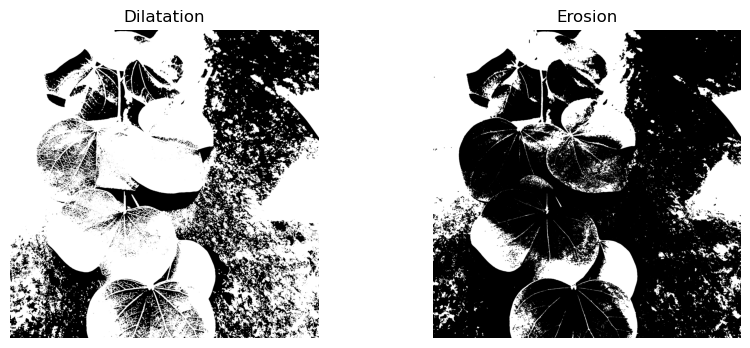

In [20]:
# Opérations morphologiques
kernel = np.ones((5, 5), np.uint8)
img_dilate = cv2.dilate(img_thresh, kernel, iterations=1)
img_erode = cv2.erode(img_thresh, kernel, iterations=1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_dilate, cmap='gray')
plt.title("Dilatation")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_erode, cmap='gray')
plt.title("Erosion")
plt.axis('off')
plt.show()

In [21]:
# Compression avec/sans perte
cv2.imwrite('image_jpeg_qualite90.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])  # Avec perte
cv2.imwrite('image_png_sans_perte.png', img, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])  # Sans perte

libpng error: Write Error


False

In [22]:
## Partie 2 : Classification d’Images avec Machine Learning (Scikit-Learn)

# Dans cette partie, nous allons :
# - Extraire des caractéristiques simples à partir des images (par exemple, histogrammes de couleurs ou de niveaux de gris)
# - Construire un jeu de données (features + labels)
# - Entraîner un classifieur (par exemple, SVM ou RandomForest)
# - Évaluer les performances du modèle


In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [24]:
### Séparation du jeu de données et apprentissage

In [25]:
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # HOG
    hog = cv2.HOGDescriptor()
    h = hog.compute(gray)
    hog_feat = h.flatten()

    # Histogramme de couleurs (RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    # LBP (simplifié)
    lbp = ((gray >= np.roll(gray, 1, axis=0)).astype(np.uint8) * 1 +
           (gray >= np.roll(gray, -1, axis=0)).astype(np.uint8) * 2 +
           (gray >= np.roll(gray, 1, axis=1)).astype(np.uint8) * 4 +
           (gray >= np.roll(gray, -1, axis=1)).astype(np.uint8) * 8)
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 256))
    lbp_hist = lbp_hist.astype("float") / (lbp_hist.sum() + 1e-7)

    # SIFT (128-descriptor averaged)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    sift_feat = np.mean(des, axis=0) if des is not None else np.zeros(128)

    return np.concatenate([hog_feat[:128], hist[:128], lbp_hist[:128], sift_feat[:128]])
# Chargement des images et extraction des caractéristiques
features = []
labels = []
dataset_path = "300_dataset"

for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if not os.path.isdir(class_path):
        continue
    for file in os.listdir(class_path):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(class_path, file)
            image = cv2.imread(img_path)
            if image is None:
                continue
            image = cv2.resize(image, (128, 128))
            feat = extract_features(image)
            features.append(feat)
            labels.append(label)

In [26]:
# Préparation des données
features = np.array(features)
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.2, random_state=42)

<span style="color: green">**3.2 Classification**</span>

In [27]:
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    results[name] = model.score(X_test, y_test)


Model: SVM
[[26  2  1  4  2  9  1  2  1  7]
 [ 4 36  1  0  1  8  0  0  5  8]
 [ 1  2 37  1  5  2  3  1  1  6]
 [ 0  4  1 39  5  3  1  0  1  2]
 [ 1  6  0  0 54  5  3  0  1  2]
 [ 2 11  0  1  3 40  0  0  0  0]
 [ 1  1  2  2  2  3 32  4  2  7]
 [ 0  1  0  7  2  0  1 52  0  6]
 [ 1  0  0  1  7  5  1  2 36  4]
 [ 1  3  4  0  2  0  4  1  1 40]]
              precision    recall  f1-score   support

           0       0.70      0.47      0.57        55
           1       0.55      0.57      0.56        63
           2       0.80      0.63      0.70        59
           3       0.71      0.70      0.70        56
           4       0.65      0.75      0.70        72
           5       0.53      0.70      0.61        57
           6       0.70      0.57      0.63        56
           7       0.84      0.75      0.79        69
           8       0.75      0.63      0.69        57
           9       0.49      0.71      0.58        56

    accuracy                           0.65       600
   macr

KeyboardInterrupt: 

<Span style="color:green">**3.3 Évaluation**</span>

In [ ]:

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy of different classifiers")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("model_comparison.png")